In [2]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore');

In [3]:
#importing data
data=pd.read_csv("train.csv")

In [4]:
#to check for any null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [5]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

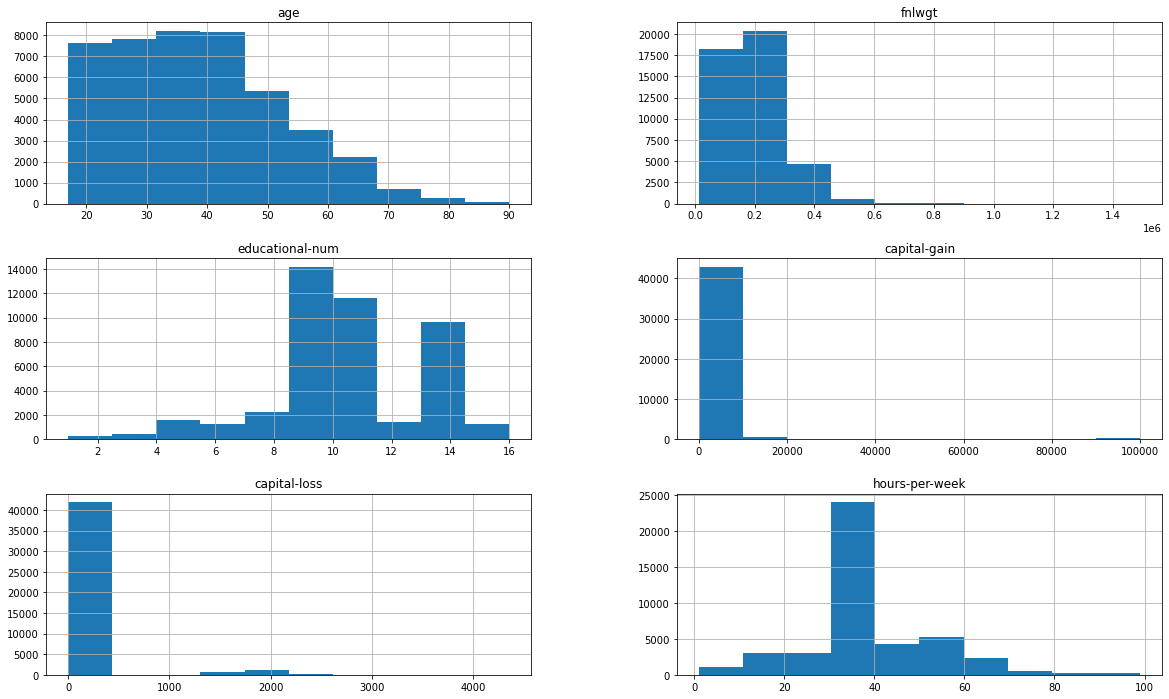

In [6]:
#drawing histogram to understand the data
rcParams['figure.figsize'] = 20, 12
data[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()


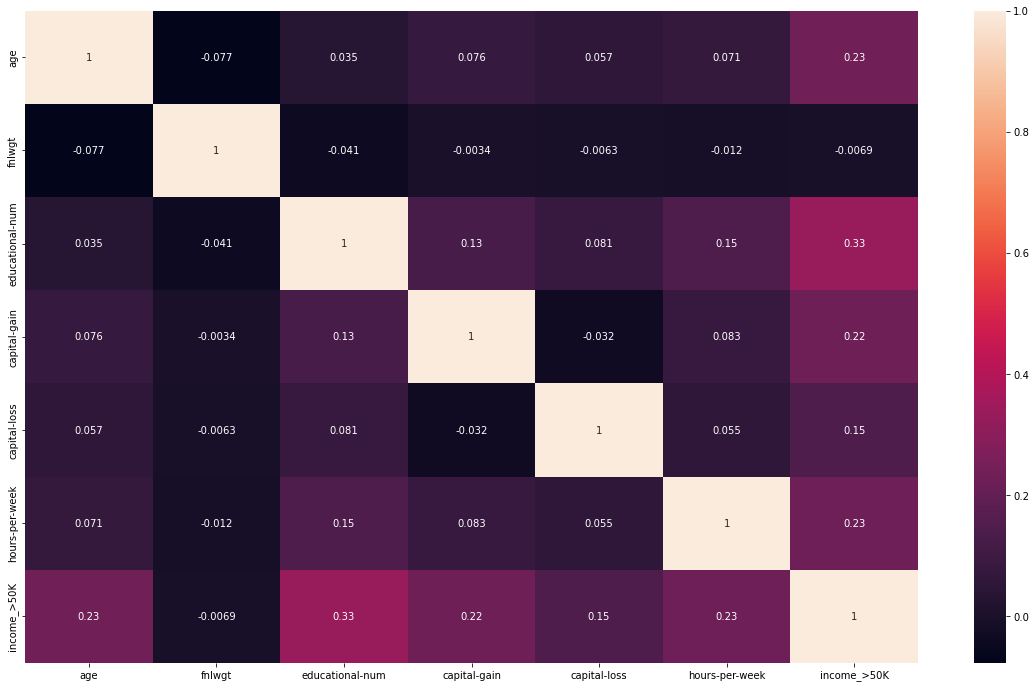

In [7]:
 #plotting the heatmap for correlation
ax = sns.heatmap(data.corr(), annot=True)

from above correlation matrix it is clear that there is no correlation between any features. 'fnlwgt' has zero correlation with any features

## Age

In [8]:
#dividing age into three groups - 0-25: Young , 25-50: Adult , 50-100: Old

data['age'] = pd.cut(data['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])   

In [9]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,Old,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,Young,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,Adult,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,Old,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,Young,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


<AxesSubplot:xlabel='age', ylabel='count'>

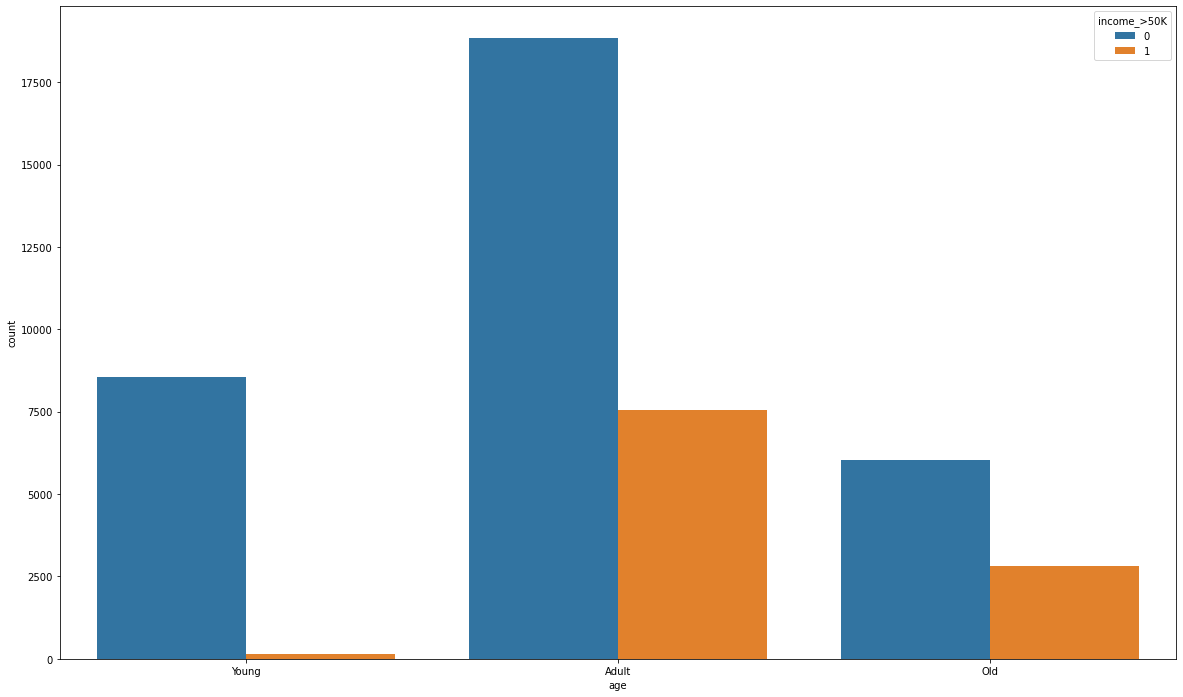

In [10]:
#plotting count plot to understand 'age'
sns.countplot(x = 'age', hue = 'income_>50K', data = data)

There are more adults in dataset that young and old.
Very less no of young people have salary more than 50K

Adults are more likely to have income more than 50K followed by old people

# Capital Gain and Capital Loss

In [11]:
data['captial diff']=data['capital-gain'] - data['capital-loss']

In [12]:
data.drop('capital-loss',axis=1,inplace=True)

In [13]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income_>50K,captial diff
0,Old,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,60,United-States,1,99999
1,Young,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,15,United-States,0,0
2,Adult,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,40,United-States,1,0
3,Old,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,40,United-States,0,0
4,Young,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,40,United-States,0,0


In [14]:
data['captial diff'].describe()

count    43957.000000
mean      1005.313306
std       7594.058078
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: captial diff, dtype: float64

dividing capital diff into 2 types: -5000 to 5000 = minor ; 5000 to 100000 = major 

those in major would be having higher capital gain compared to capital loss

In [15]:
data['captial diff']=pd.cut(data['captial diff'],bins=[-5000,5000,100000], labels=['minor','major'])

In [16]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income_>50K,captial diff
0,Old,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,60,United-States,1,major
1,Young,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,15,United-States,0,minor
2,Adult,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,40,United-States,1,minor
3,Old,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,40,United-States,0,minor
4,Young,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,40,United-States,0,minor


<AxesSubplot:xlabel='captial diff', ylabel='count'>

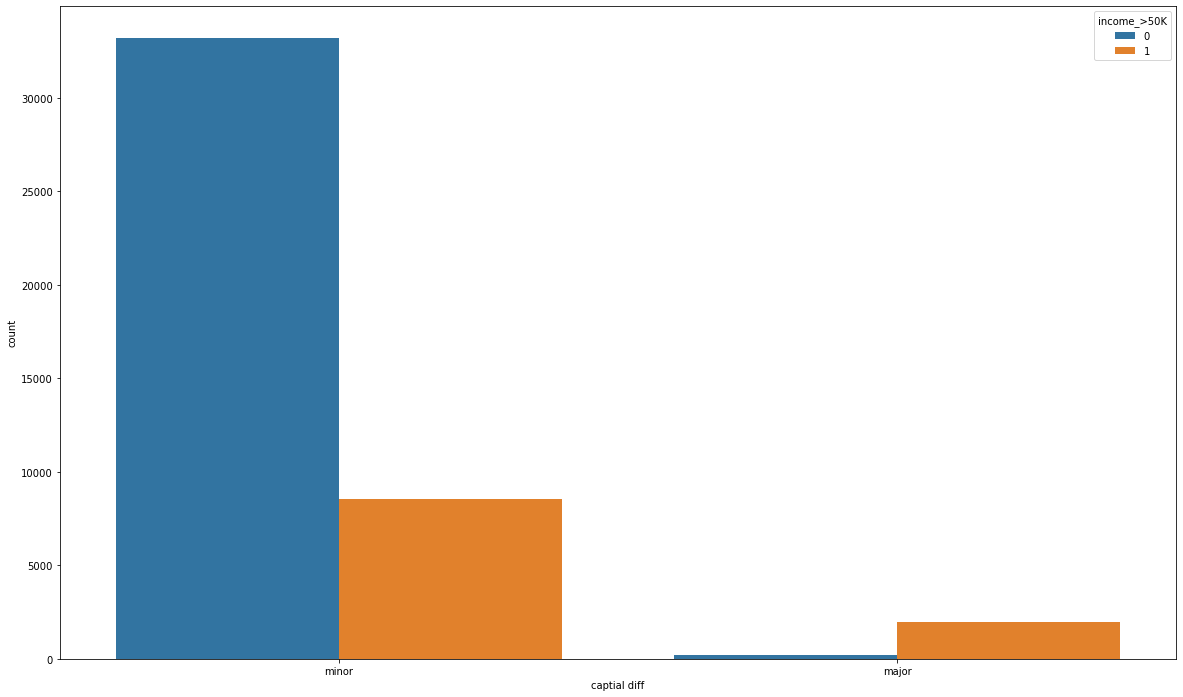

In [17]:
#plotting countplot to understand 'capital diff'
sns.countplot(x='captial diff', hue='income_>50K', data=data)

more number of people in 'minor' do not have income more than 50K

more number of people in 'major' have income more than 50K. Those with higher capital gain than capital loss is likely to have income more than 50K

## Final weight

As seen in above correlation matrix, fnlwgt column has zero correlation with any other features. So dropping this column

In [18]:
data.drop(['fnlwgt'],axis=1,inplace=True)

## hours-per-week

In [19]:
data['hours-per-week'].describe()

count    43957.000000
mean        40.407694
std         12.400303
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

from the histogram and statistics above, hours per week are more in the range of 30-40 hours.
So dividing them into groups of - 0-30, 30-40, 40-100

In [20]:
data['hours-per-week']=pd.cut(data['hours-per-week'],bins=[0,30,40,100], labels=['lesser hours','normal hours','extra hours'])

In [21]:
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income_>50K,captial diff
0,Old,Private,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,extra hours,United-States,1,major
1,Young,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,lesser hours,United-States,0,minor
2,Adult,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,normal hours,United-States,1,minor
3,Old,State-gov,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,normal hours,United-States,0,minor
4,Young,State-gov,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,normal hours,United-States,0,minor


<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

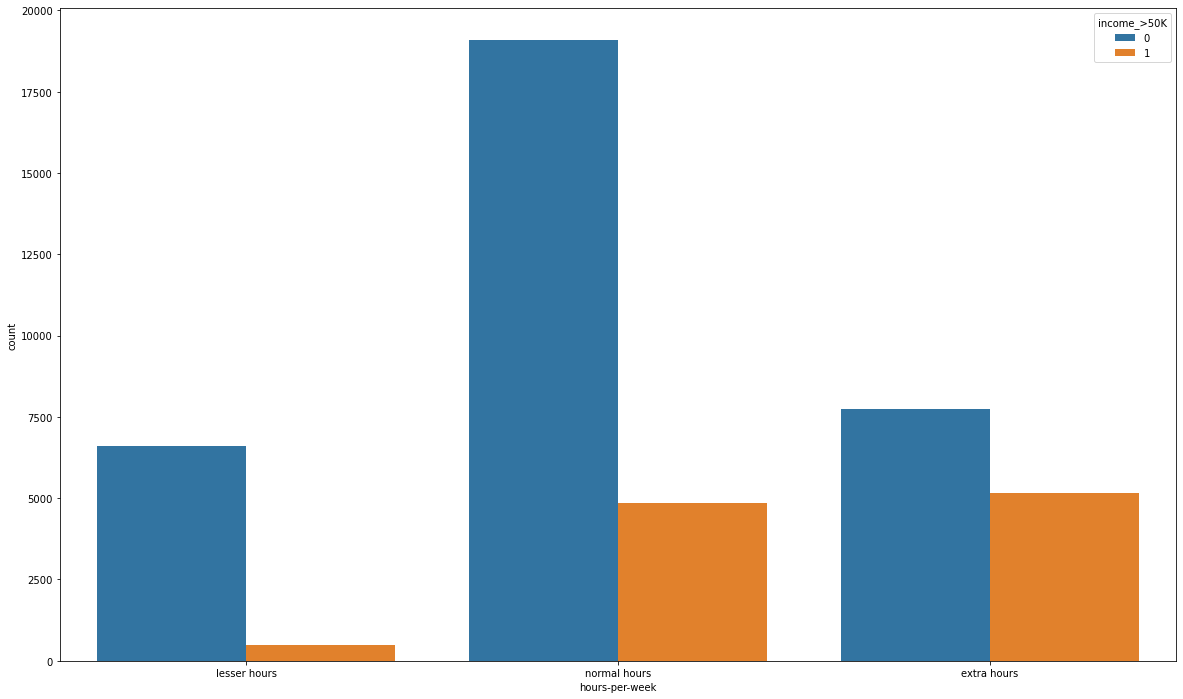

In [22]:
#plotting count plot
sns.countplot(x='hours-per-week',hue='income_>50K',data=data)

people working extra hours are likely to have income more than 50K, probably because they would getting overtime income

## workclass

<AxesSubplot:xlabel='workclass', ylabel='count'>

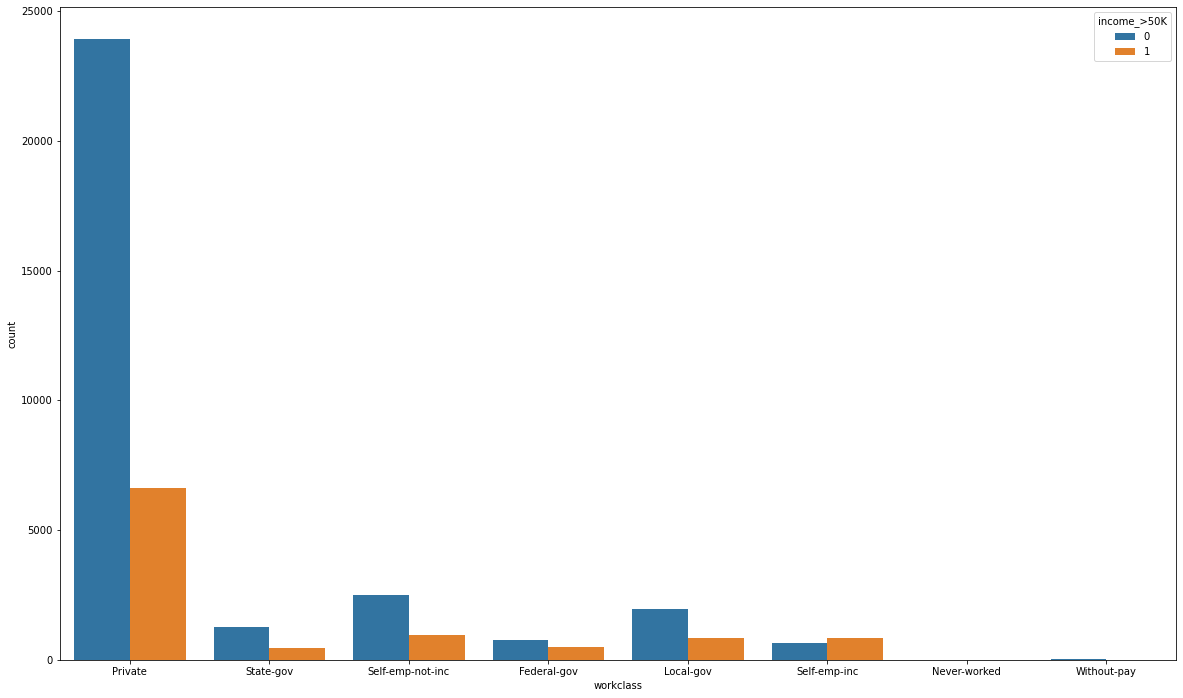

In [23]:
sns.countplot(x='workclass',hue='income_>50K', data=data)

'never worked' and 'without pay' do not have chance of having income more than 50K, so its safe to remove them.

Also there are more of people working in 'private' and have income more than 50K

In [24]:
data = data.drop(data[data['workclass'] == 'Without-pay'].index)
data = data.drop(data[data['workclass'] == 'Never-worked'].index)

## education and educational-num	

<AxesSubplot:xlabel='education', ylabel='count'>

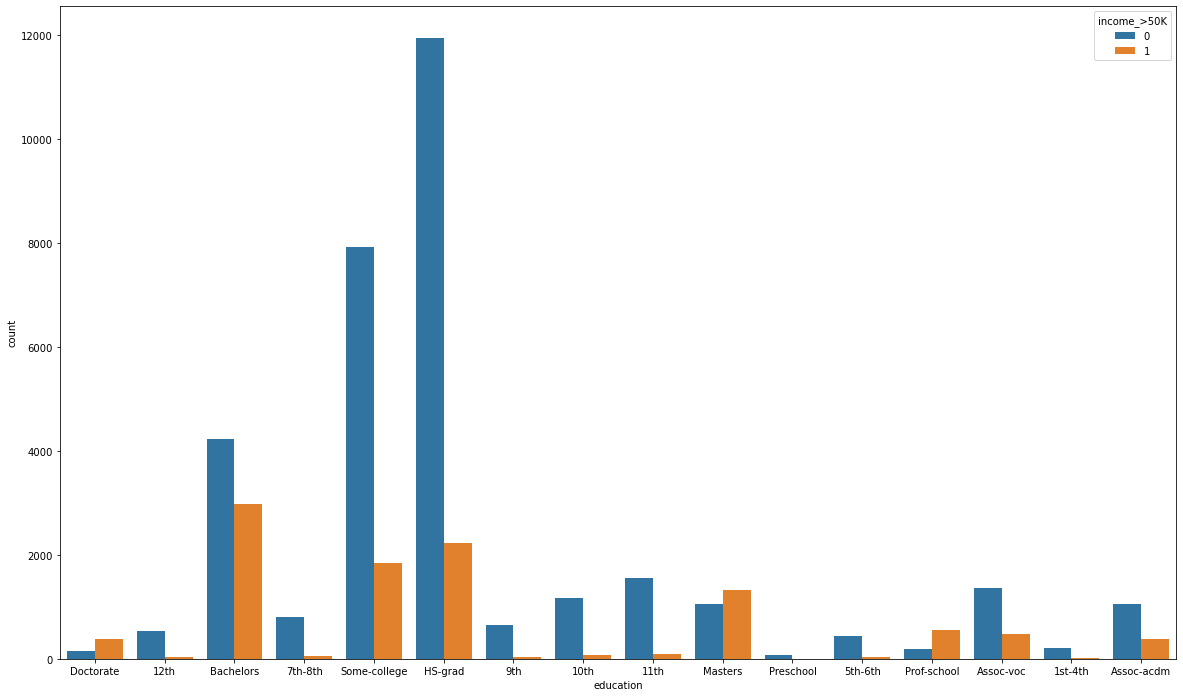

In [25]:
sns.countplot(x='education', hue='income_>50K',data=data)

In [26]:
#to check if there is any relation between education and educational number
education_classes=data['education'].unique()
education_classes

array(['Doctorate', '12th', 'Bachelors', '7th-8th', 'Some-college',
       'HS-grad', '9th', '10th', '11th', 'Masters', 'Preschool',
       '5th-6th', 'Prof-school', 'Assoc-voc', '1st-4th', 'Assoc-acdm'],
      dtype=object)

In [27]:
for i in education_classes:
    print("For {}, the Education Number is {}".format(i, data[data['education'] == i]['educational-num'].unique()))
    

For Doctorate, the Education Number is [16]
For 12th, the Education Number is [8]
For Bachelors, the Education Number is [13]
For 7th-8th, the Education Number is [4]
For Some-college, the Education Number is [10]
For HS-grad, the Education Number is [9]
For 9th, the Education Number is [5]
For 10th, the Education Number is [6]
For 11th, the Education Number is [7]
For Masters, the Education Number is [14]
For Preschool, the Education Number is [1]
For 5th-6th, the Education Number is [3]
For Prof-school, the Education Number is [15]
For Assoc-voc, the Education Number is [11]
For 1st-4th, the Education Number is [2]
For Assoc-acdm, the Education Number is [12]


from above it is clear that education and educational-num columns are same, so it is safe to drop any one of these columns

In [28]:
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,income_>50K,captial diff
0,Old,Private,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,extra hours,United-States,1,major
1,Young,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,lesser hours,United-States,0,minor
2,Adult,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,normal hours,United-States,1,minor
3,Old,State-gov,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,normal hours,United-States,0,minor
4,Young,State-gov,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,normal hours,United-States,0,minor


In [29]:
data.drop(['educational-num'], axis = 1, inplace = True)

In [30]:
data['education'].replace(['12th','7th-8th','9th','10th','11th','Preschool','5th-6th','1st-4th'],'School',inplace=True)

In [31]:
data['education'].value_counts()

HS-grad         14182
Some-college     9786
Bachelors        7219
School           5790
Masters          2392
Assoc-voc        1831
Assoc-acdm       1445
Prof-school       748
Doctorate         536
Name: education, dtype: int64

## marital-status and relationship

In [32]:
data['marital-status'].value_counts()

Married-civ-spouse       20134
Never-married            14502
Divorced                  5970
Widowed                   1363
Separated                 1361
Married-spouse-absent      568
Married-AF-spouse           31
Name: marital-status, dtype: int64

In [33]:
data['relationship'].value_counts()

Husband           17742
Not-in-family     11320
Own-child          6823
Unmarried          4600
Wife               2087
Other-relative     1357
Name: relationship, dtype: int64

## Occupation

<AxesSubplot:xlabel='occupation', ylabel='count'>

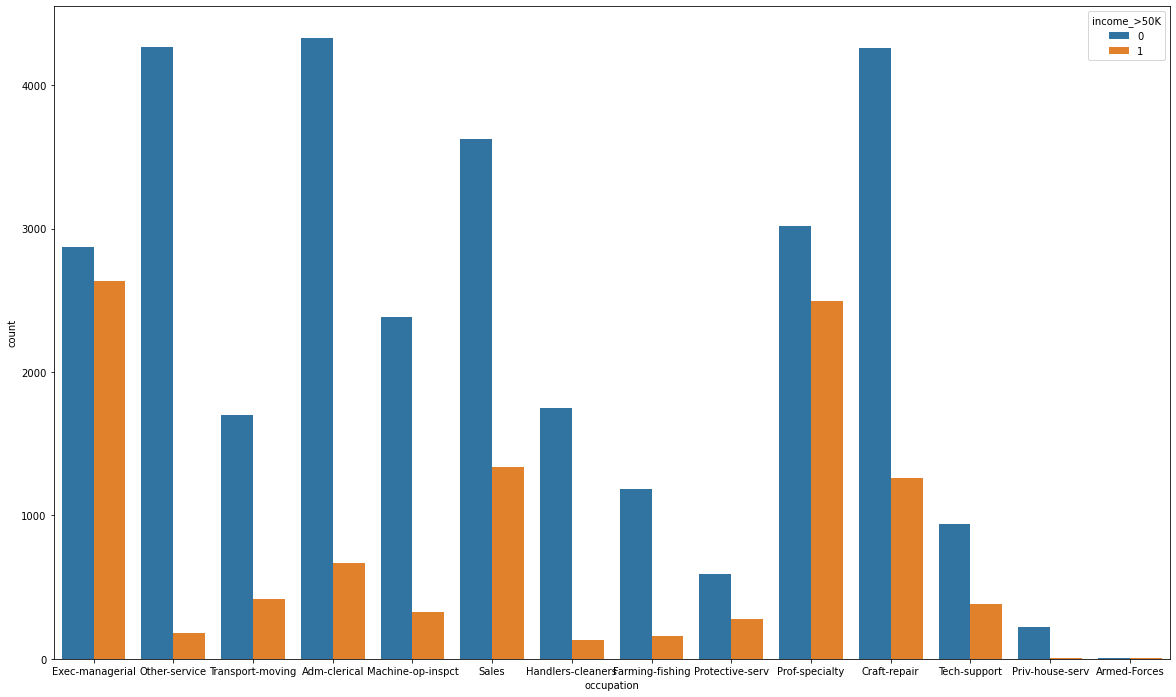

In [34]:
sns.countplot(x='occupation',hue='income_>50K',data=data)

## Race

<AxesSubplot:xlabel='race', ylabel='count'>

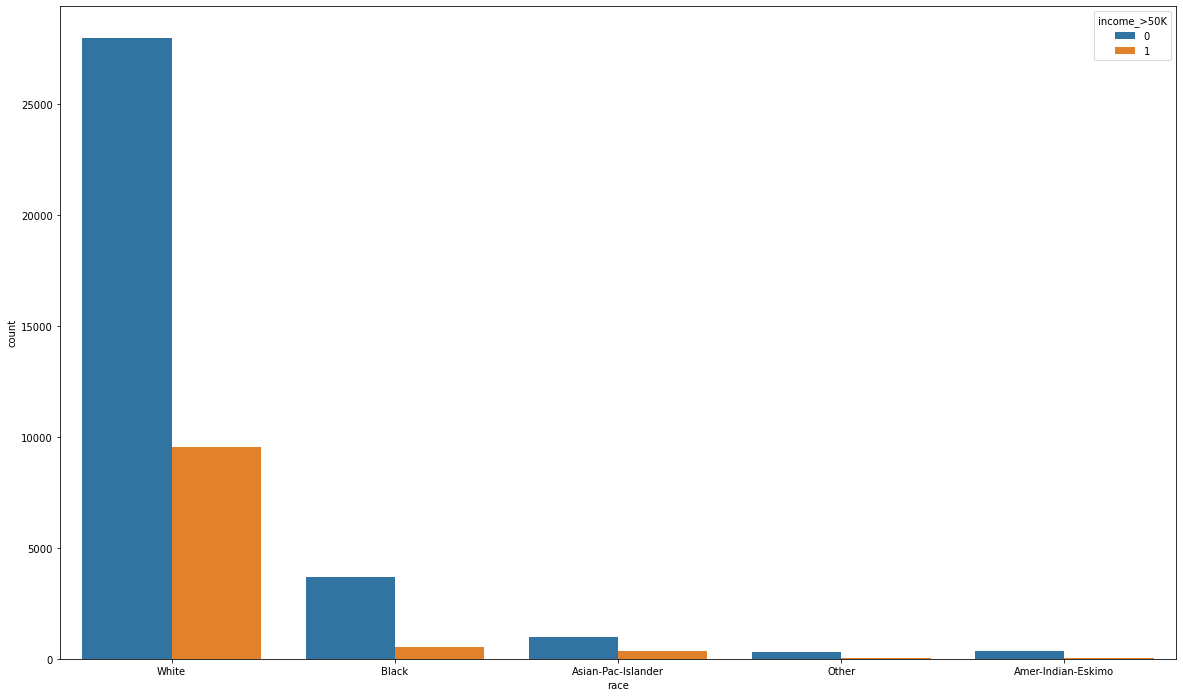

In [35]:
sns.countplot(x='race',hue='income_>50K',data=data)

majority of data is about 'white' race and other race has comparitively less data. So combining all other race as 'Other'

In [36]:
data['race'].replace(['Black','Asian-Pac-Islander','Other','Amer-Indian-Eskimo'],'Other',inplace=True)

In [37]:
data['race'].value_counts()

White    37549
Other     6380
Name: race, dtype: int64

## Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

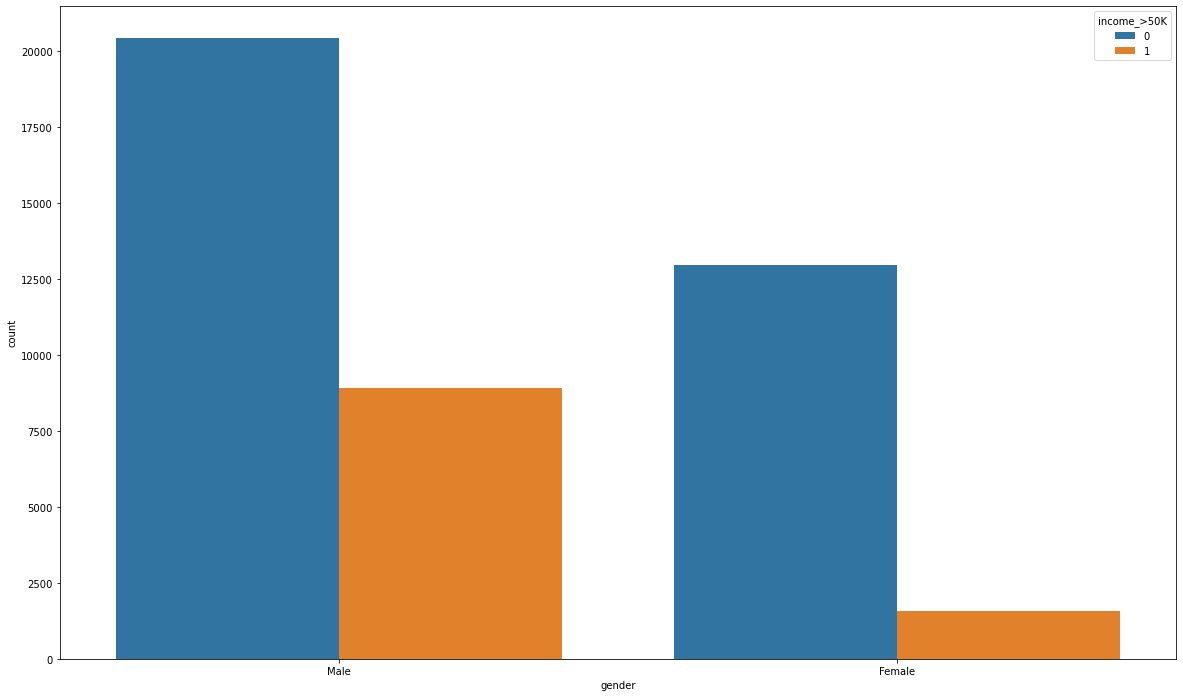

In [38]:
sns.countplot(x='gender',hue='income_>50K',data=data)

when compared both gender, 'male' are more in number to have income more tha 50K than 'female'

In [39]:
data['native-country'].value_counts()

United-States                 39402
Mexico                          880
Philippines                     272
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South                           105
Dominican-Republic               97
Jamaica                          97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         59
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                           44
Ecuador                          42
Peru                        

<AxesSubplot:xlabel='native-country', ylabel='count'>

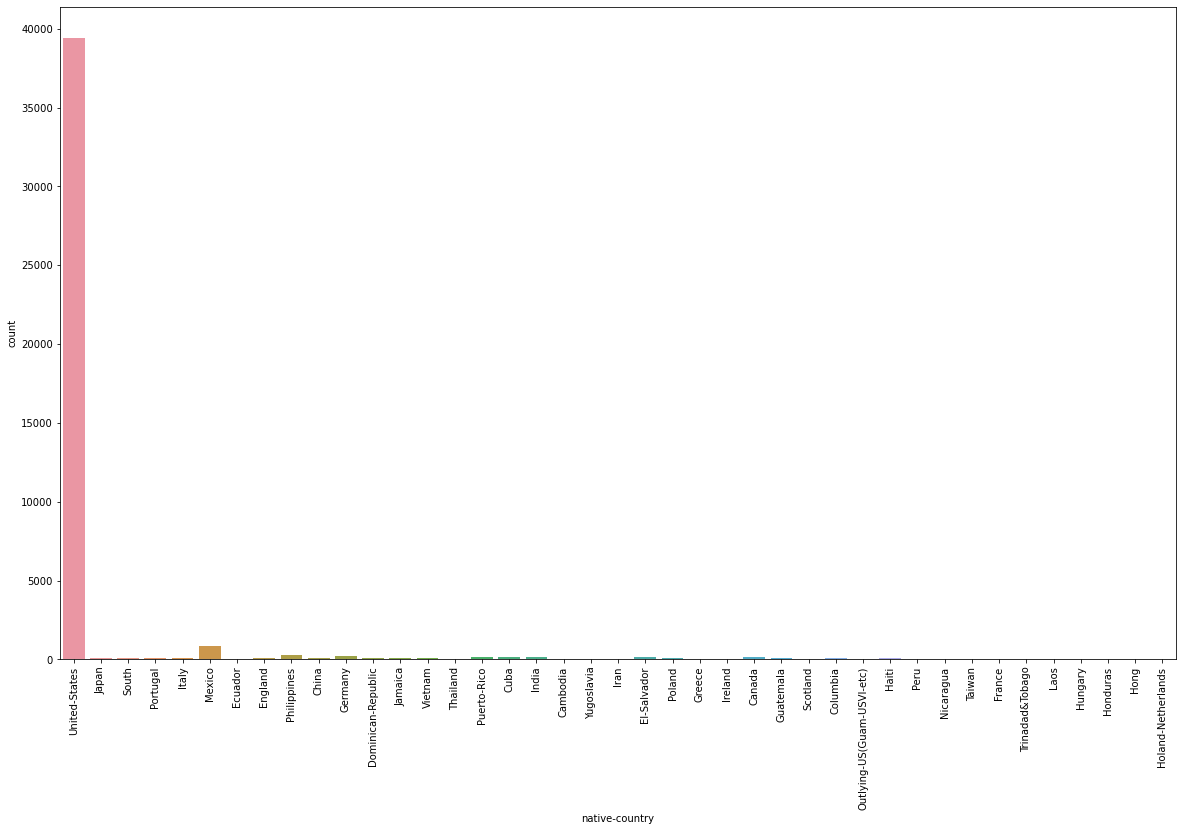

In [40]:
plt.xticks(rotation = 90)
sns.countplot(x='native-country',data=data)

The majority of people are from United States compared to other country. So dividing them into two groups as 'United States' and 'Other'

In [41]:
countries=np.array(data['native-country'].unique())
countries

array(['United-States', 'Japan', 'South', 'Portugal', 'Italy', 'Mexico',
       'Ecuador', 'England', 'Philippines', 'China', 'Germany', nan,
       'Dominican-Republic', 'Jamaica', 'Vietnam', 'Thailand',
       'Puerto-Rico', 'Cuba', 'India', 'Cambodia', 'Yugoslavia', 'Iran',
       'El-Salvador', 'Poland', 'Greece', 'Ireland', 'Canada',
       'Guatemala', 'Scotland', 'Columbia', 'Outlying-US(Guam-USVI-etc)',
       'Haiti', 'Peru', 'Nicaragua', 'Taiwan', 'France',
       'Trinadad&Tobago', 'Laos', 'Hungary', 'Honduras', 'Hong',
       'Holand-Netherlands'], dtype=object)

In [42]:
countries=np.delete(countries,0)
countries

array(['Japan', 'South', 'Portugal', 'Italy', 'Mexico', 'Ecuador',
       'England', 'Philippines', 'China', 'Germany', nan,
       'Dominican-Republic', 'Jamaica', 'Vietnam', 'Thailand',
       'Puerto-Rico', 'Cuba', 'India', 'Cambodia', 'Yugoslavia', 'Iran',
       'El-Salvador', 'Poland', 'Greece', 'Ireland', 'Canada',
       'Guatemala', 'Scotland', 'Columbia', 'Outlying-US(Guam-USVI-etc)',
       'Haiti', 'Peru', 'Nicaragua', 'Taiwan', 'France',
       'Trinadad&Tobago', 'Laos', 'Hungary', 'Honduras', 'Hong',
       'Holand-Netherlands'], dtype=object)

In [43]:
data['native-country'].replace(countries,'Other',inplace=True)

<AxesSubplot:xlabel='native-country', ylabel='count'>

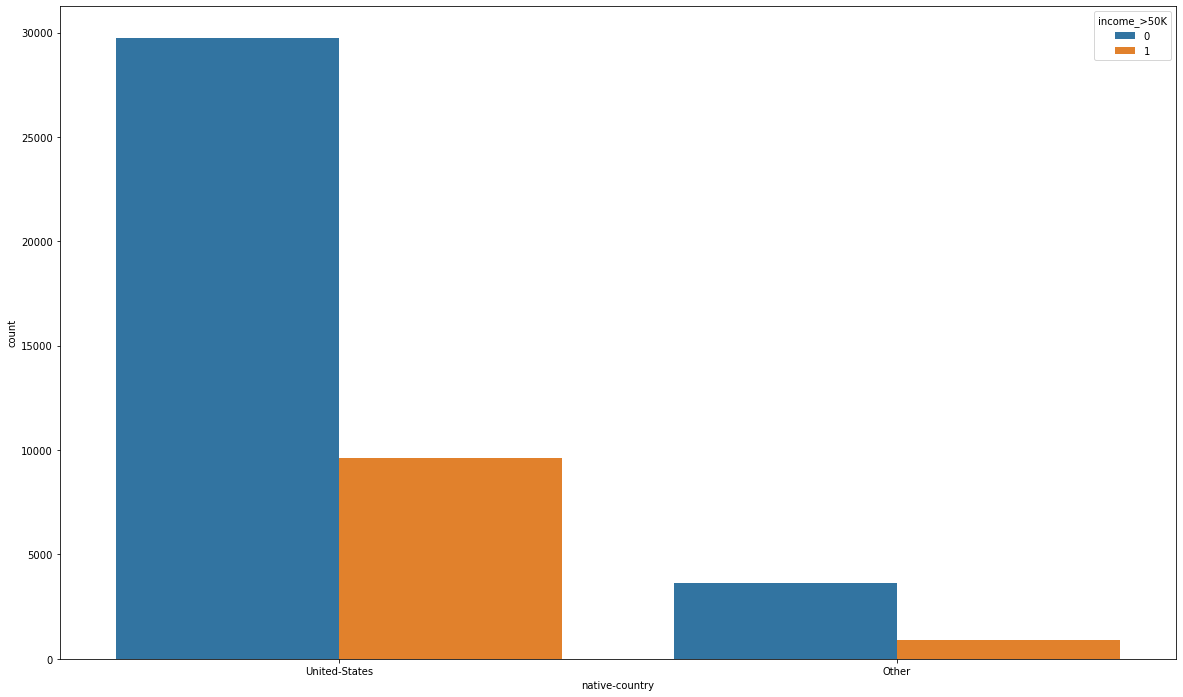

In [44]:
sns.countplot(x='native-country',hue='income_>50K',data=data)

## Creating model

In [45]:
y_train=data['income_>50K']

In [46]:
X_train=data.drop(['income_>50K'],axis=1)

In [47]:
X_train.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country,captial diff
0,Old,Private,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male,99999,extra hours,United-States,major
1,Young,Private,School,Never-married,Other-service,Own-child,White,Male,0,lesser hours,United-States,minor
2,Adult,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,normal hours,United-States,minor
3,Old,State-gov,School,Married-civ-spouse,Transport-moving,Husband,White,Male,0,normal hours,United-States,minor
4,Young,State-gov,Some-college,Never-married,Other-service,Not-in-family,Other,Male,0,normal hours,United-States,minor


In [48]:
X_train.drop('capital-gain',axis=1,inplace=True)

In [49]:
X_train.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,captial diff
0,Old,Private,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male,extra hours,United-States,major
1,Young,Private,School,Never-married,Other-service,Own-child,White,Male,lesser hours,United-States,minor
2,Adult,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,normal hours,United-States,minor
3,Old,State-gov,School,Married-civ-spouse,Transport-moving,Husband,White,Male,normal hours,United-States,minor
4,Young,State-gov,Some-college,Never-married,Other-service,Not-in-family,Other,Male,normal hours,United-States,minor


In [50]:
#label encoding
X_train = pd.get_dummies(X_train)

In [51]:
X_train.head()

,age_Young,age_Adult,age_Old,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_Assoc-acdm,...,race_White,gender_Female,gender_Male,hours-per-week_lesser hours,hours-per-week_normal hours,hours-per-week_extra hours,native-country_Other,native-country_United-States,captial diff_minor,captial diff_major
0,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,1,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,0,0,1,1,0
2,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0


Using random forest 

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [54]:
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

Importing test data

In [55]:
X_test=pd.read_csv("test_data.csv")

In [56]:
X_test.head()

,Unnamed: 0,age_Young,age_Adult,age_Old,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,race_White,gender_Female,gender_Male,hours-per-week_lesser hours,hours-per-week_normal hours,hours-per-week_extra hours,native-country_Other,native-country_United-States,captial diff_minor,captial diff_major
0,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,1,0,1,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,1,0
2,2,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,3,1,0,0,0,0,1,0,0,0,...,1,0,1,1,0,0,0,1,1,0
4,4,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0


In [57]:
X_test.drop('Unnamed: 0',axis=1,inplace=True)

In [58]:
X_test.head()

,age_Young,age_Adult,age_Old,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_Assoc-acdm,...,race_White,gender_Female,gender_Male,hours-per-week_lesser hours,hours-per-week_normal hours,hours-per-week_extra hours,native-country_Other,native-country_United-States,captial diff_minor,captial diff_major
0,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0,1,0,0,0,1,0,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,1,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0


In [59]:
y_pred = regressor.predict(X_test)

In [60]:
y_pred=np.round(y_pred)

In [61]:
df=pd.DataFrame({"Predicted":y_pred})

In [62]:
df

,Predicted
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
894,1.0
895,0.0
896,0.0
897,1.0


In [63]:
y_pred

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1.

In [64]:
y_train

0        1
1        0
2        1
3        0
4        0
        ..
43952    1
43953    0
43954    0
43955    0
43956    0
Name: income_>50K, Length: 43929, dtype: int64

In [65]:
df.to_csv('outcome.csv')